# Learning Curves D1-D8 

In [4]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib.patches as mpatches
import sys
sys.path.append('../..')
from collections import OrderedDict
from data_import import*
from helper import*
from plot_params import*
pp = PlotParams()
from paths import*
paths = paths()

In [7]:
f4_path = paths.f4_path + '4e9c1cf/'  

## Read the data

In [8]:
data = import_and_transform_data(f4_path, 'NOGTHSH_LEARNING_CURVES_4e9c1cf_9A_23_09_05.csv')
data_tag, data = data

## Filtering for rt<180, rt > 5000 and random trials, drop RTs above 3std

In [9]:
data_filt = drop_RTs_above_3std_below_180(data)

## Compute correlation

In [10]:
corr_matrix = (data_filt
                   .groupby(['model', 'participant', 'e_train', 'e_test', 'day'])
                   [['rt','rt_predicted']]
                   .corr())

corr_matrix
corr_matrix.reset_index(inplace = True)
corr_matrix.drop(['level_5', 'rt'], axis = 1, inplace = True)
corr_matrix

matrix = corr_matrix.loc[corr_matrix['rt_predicted'] !=1]
matrix['r_sqr'] = matrix.rt_predicted**2
matrix.drop('rt_predicted', axis = 1, inplace = True)
matrix;

## Reshape 

In [11]:
LC_d1_d8 = matrix.loc[~matrix['day'].isin([9, 10])]
LC_d1_d8 =  LC_d1_d8.pivot(index = ['participant', 'day'], columns = 'model', values = 'r_sqr')
LC_d1_d8.reset_index('day', inplace=True)

## Plot the learning curves

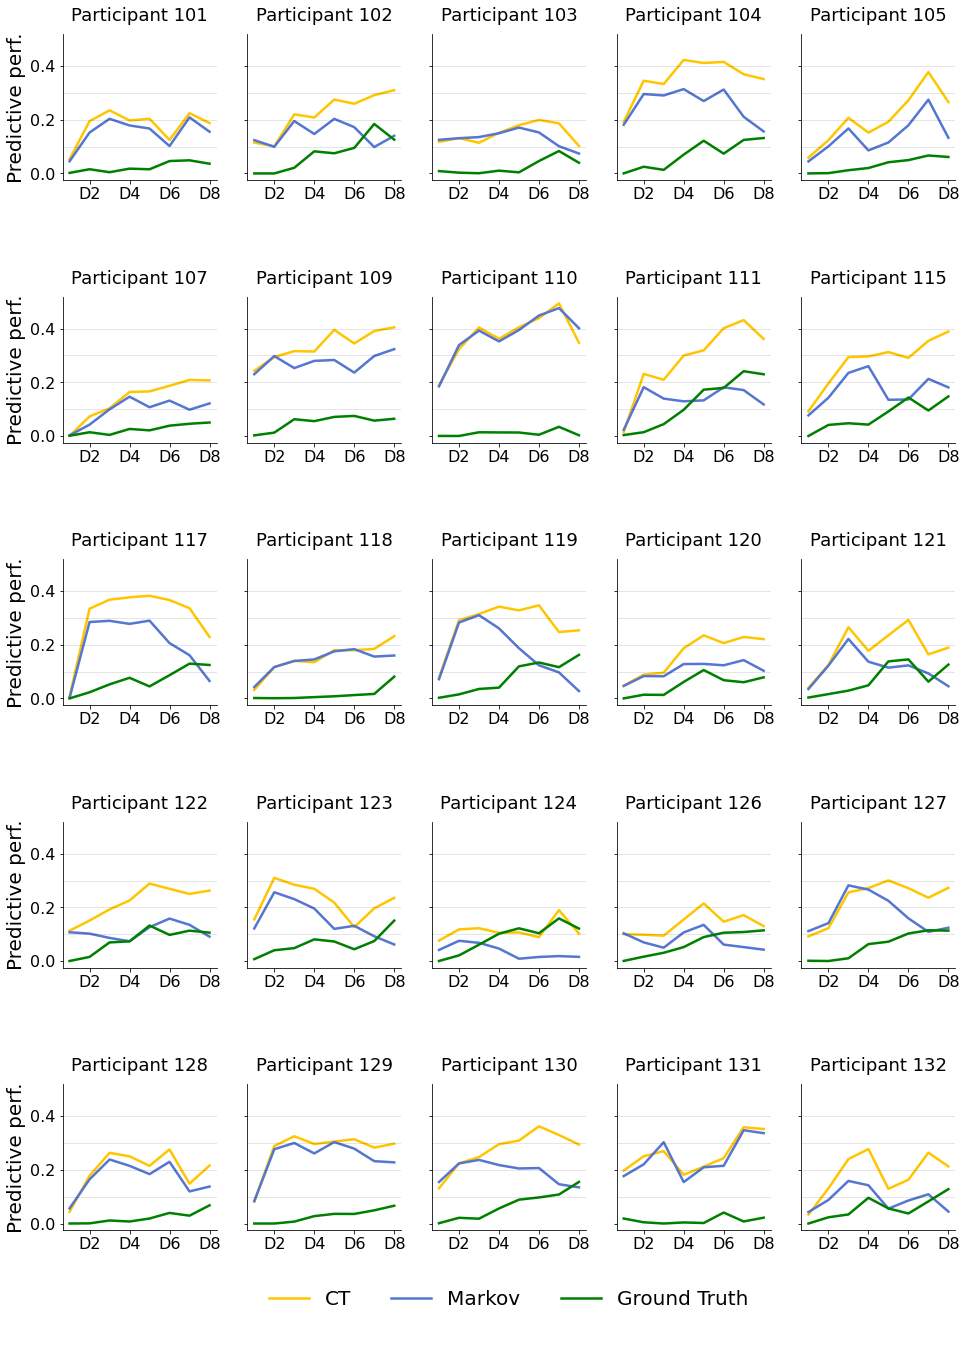

In [12]:
n_row, n_col =5,5
participants = LC_d1_d8.index.unique()


fig, ax = plt.subplots(n_row, n_col, sharex=False, sharey=True, figsize = (16,22), facecolor = 'white')
row, col = 0, 0
for p in participants:
    
    
    sns_plot = sns.lineplot(ax = ax[row, col], data = LC_d1_d8.loc[p, :], y = 'iHMM', x = 'day', label = 'CT', color = pp.ct_orange, lw = 2.5)
    sns_plot = sns.lineplot(ax = ax[row, col], data = LC_d1_d8.loc[p, :], y = 'Markov', x = 'day', label = 'Markov', color = pp.markov_blue, lw = 2.5)
    sns_plot = sns.lineplot(ax = ax[row, col], data = LC_d1_d8.loc[p, :], y = 'GroundTruth', x = 'day', label = 'Ground Truth', color = 'green', lw = 2.5)

    ## Set legend, title 
    sns_plot.legend([],[], frameon=False)
    sns_plot.set_title('Participant ' + str(p), fontsize = 18, y = 1.05)
    
    
    ## Set xaxis 
    sns_plot.set_xlabel(None)
    sns_plot.set_xticks(np.arange(2,9,2))
    sns_plot.set_xticklabels(['D2', 'D4', 'D6', 'D8'], fontsize = 16)

    ## Set xaxis
    sns_plot.set_ylabel('Predictive perf.', fontsize = 20)
    #sns_plot.set_ylabel(None)
    sns_plot.set_yticks(np.arange(0,0.6, 0.2))
    sns_plot.set_yticklabels(np.arange(0,0.6, 0.2), fontsize = 16)
    
    
    ## Set vlines
    
    sns_plot.axhline(y = 0.1, color = 'black', lw = 0.5, alpha = 0.2)
    sns_plot.axhline(y = 0.2, color = 'black', lw = 0.5, alpha = 0.2)
    sns_plot.axhline(y = 0.3, color = 'black', lw = 0.5, alpha = 0.2)
    sns_plot.axhline(y = 0.4, color = 'black', lw = 0.5, alpha = 0.2)
    

    col += 1
    if col == n_col:
        col = 0
        row += 1
        
        
        
        
#fig.text(0.08, 0.5, 'Predictive performance',  rotation=90)
handles, labels = sns_plot.get_legend_handles_labels()       
sns.despine()
plt.subplots_adjust(hspace = 0.8) 

fig.legend(handles, labels, loc = (0.27, 0.04), ncol = 3, frameon = False, fontsize = 20);

In [13]:
fig.savefig('/Users/szekelyanna/Dropbox/CSNL/cognitive_tomography/analysis_2022/plots/manuscript_plots_standard/' + 'LEARNING_CURVES_all.png', dpi = 300, bbox_inches='tight')